# P346 Mid-sem exam

In [23]:
import Library.pRNG as Random
import Library.Read_matrix as Read
import Library.Root_finder as Root
import Library.Linear_eqsolver as Solve
import Library.Data_fitting as Fit
from math import *
import matplotlib.pyplot as plt

## Question 1

In [3]:
n = 100000
x = Random.Random_to(3,n,2)
y = Random.Random_to(5,n,1)

count = 0
trial = 0
for i in range (0, n):
  p = (x[i]**2)/4 + (y[i]**2)
  if p <= 1:
    count = count + 1
    trial = trial + 1
  else:
    trial = trial + 1

area_quadrant = (count/trial)*2   #Area of 1 quadrant = 2 sq. units 
total_area = 4*area_quadrant
print("Total area of the ellipse = ", total_area, "~ 2\u03C0 = \u03C0ab")


Total area of the ellipse =  6.28184 ~ 2π = πab


## Question 2

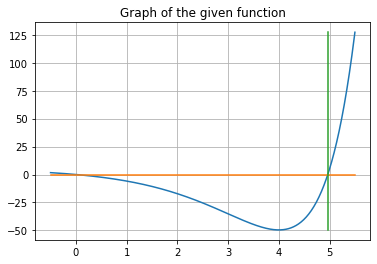

Value of Wein's constant = 2.899 * 10^(-3) metre-Kelvin


In [24]:
f = lambda x: (x-5)*math.exp(x) + 5
# Finding solution with Newton_Raphson method with inital guess = 4.5
solution = Root.Newton_Raphson(f, 4.5, 1e-4)[0]

# Plotting the curve of the function to verify the root
x = []
y = []
i = -0.5
while i <= 5.5:
    y0 = (i-5)*math.exp(i) + 5
    y.append(y0)
    x0 = i
    x.append(x0)
    i += 0.01
plt.plot(x, y)
plt.title("Graph of the given function")
plt.grid()
plt.plot([min(x),max(x)],[0,0])
plt.plot([solution,solution], [max(y),min(y)])
plt.show()

# Calculating value of Wein's constant
b = (6.626e-34 * 3e8)/(1.381e-23 * solution)
print("Value of Wein's constant =", round(b*1000,4),"* 10^(-3) metre-Kelvin")


## Question 3

In [25]:
# Reading the matrices from the input file
A = Read.read_Mat(r"Midsem Input files/msem_gs_A.txt")
B = Read.read_Mat(r"Midsem Input files/msem_gs_B.txt")

# Solving the system of equations using Gauss-Seidel iterative method
print("The solutions are calculated by using Gauss-Seidel method (with precision = 10^-6)")
Solve.Gauss_Seidel_eqsolver(A, B, 1e-6)


The solutions are calculated by using Gauss-Seidel method (with precision = 10^-6)
Entered precision level reached with no. of iterations: 13
The solutions are given respectively as:
1.4999998297596437
-0.4999999999999992
1.9999999999999998
-2.4999999148640373
1.0000000000000004
-0.9999999999957907


## Question 4

Value of parameters for exponential fit = (-0.05845553447818332, 12.212992824568268)


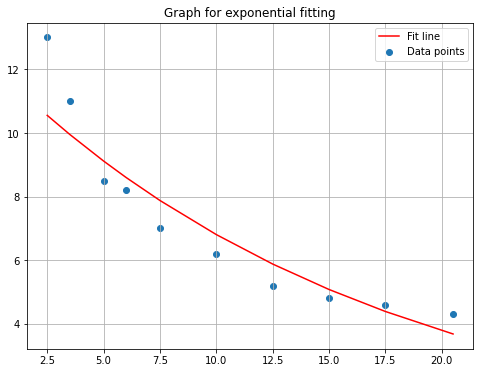

Value of parameters for power law fit = (-0.53740930145056, 21.04635215955)


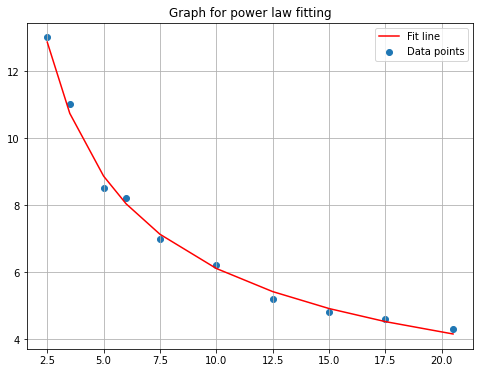

Value of Pearson's r for exponential fit = 0.9496271643617618
Value of Pearson's r for power law fit = 0.9972554064982692

As value of Pearson's r for power law fit is closer to 1, therefore it is a better fit.


In [29]:
# Reading the fitting data from the input file
X,Y = Fit.Read_data(r"Midsem Input files/msem_fit.txt")

# Fitting the data with exponential eqn. (y = a*e^(bx))
print("Value of parameters for exponential fit =", Fit.Exponential_fit(X,Y))
Fit.Plot_exp_fit(X,Y)

# Fitting the data with power law eqn. (y = a*x^b)
print("Value of parameters for power law fit =", Fit.Power_fit(X,Y))
Fit.Plot_power_fit(X,Y)

# Finding better fit via Pearson's coefficient r
X_log = []
Y_log = []
for i in range(len(X)):
    X_log.append(log(X[i]))
    Y_log.append(log(Y[i]))

print("Value of Pearson's r for exponential fit =", Fit.Pearsons_r(X,Y_log))
print("Value of Pearson's r for power law fit =", Fit.Pearsons_r(X_log,Y_log))
print()
print("As value of Pearson's r for power law fit is closer to 1, therefore it is a better fit.")
